# Data

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame( columns = ['cat_1', 'cat_2'] )

n = 4
m = 5

sample_size = 100

df['cat_1'] = np.random.randint(1, n, sample_size)
df['cat_2'] = np.random.randint(1, m, sample_size)
df['random_x'] = np.random.random(sample_size)

beta = 10*np.random.rand()

shift_cat1 = -1.5*np.random.rand(df['cat_1'].nunique())
shift_cat2 = -2.5*np.random.rand(df['cat_2'].nunique())

lin_model = beta* df['random_x'] + shift_cat1[df['cat_1'].values - 1] + shift_cat2[df['cat_2'].values - 1] + \
2.0*np.random.rand(sample_size)

probs = ( 1 + np.exp(lin_model) ) ** -1.0

labels = np.ones(df.shape[0], ).astype(int)

labels[probs < 0.5] = 0

df['random_y'] = labels

# Data Visualization

In [2]:
import matplotlib.pyplot as plt

plt.scatter( x = df['random_x'], y = df['random_y'] )

plt.show()

# Modelling

In [3]:
from bayes_tree import BGRFClassifier

model = BGRFClassifier(['random_x', 'cat_1', 'cat_2'], target_col = 'random_y', n_estimators = 10, max_depth = 4)

In [4]:
model.fit(df)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2af3e3b4d0e69ab8017a7075b10ba8ea NOW.
/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [5]:
print(model.model)

Inference for Stan model: anon_model_2af3e3b4d0e69ab8017a7075b10ba8ea.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
beta[0]   3.96    0.71   4.06 6.3e-3    1.7   2.59   4.77  15.32     33   1.07
beta[1]   1.02    0.28   3.35  -6.12  -0.15   0.98   2.18   8.61    142   1.02
beta[2]   2.34    0.56   3.32   -2.2   0.84   1.65   3.04  11.39     35   1.07
beta[3]   1.75    0.53   3.48  -4.69   0.17   1.38   2.71  10.92     43   1.06
beta[4]   2.46    0.52   3.21  -1.75   0.89   1.74   3.16   11.4     38   1.07
beta[5]   3.95     0.8   3.99   0.13   1.65   2.81   4.92  15.35     25   1.11
beta[6]   3.39     0.6   3.32  -0.22   1.48   2.43   4.16  12.94     31   1.08
beta[7]   1.98    0.35   2.81  -3.32   0.86   1.64   2.88   8.73     64   1.04
beta[8]    1.5    0.25   3.21  -5.77   0.28   1.46   2.64   8.81    165   1.01
beta[9]    2.3    0.2

# Validation Performance

In [6]:
val_size = 1000

df_val = pd.DataFrame( columns = ['random_x'])

df_val['random_x'] = np.random.rand(val_size)

df_val['cat_1'] = np.random.randint(1, n, val_size)
df_val['cat_2'] = np.random.randint(1, m, val_size)

lin_model = beta* df_val['random_x'] + \
shift_cat1[df_val['cat_1'].values - 1] + shift_cat2[df_val['cat_2'].values - 1]

probs = ( 1 + np.exp(lin_model) ) ** -1.0

val_labels = np.ones(df_val.shape[0], ).astype(int)

val_labels[probs < 0.5] = 0

In [7]:
train_accuracy = model.score(df, labels)
val_accuracy = model.score(df_val, val_labels)

print('Train Mean Accuracy: ' + str(train_accuracy))
print('Validation Mean Accuracy: ' + str(val_accuracy))

Train Mean Accuracy: 0.9
Validation Mean Accuracy: 0.936


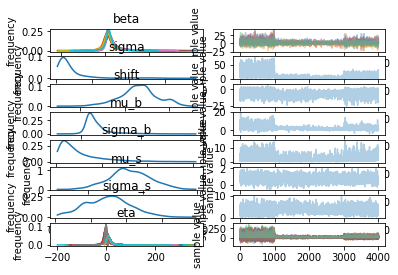

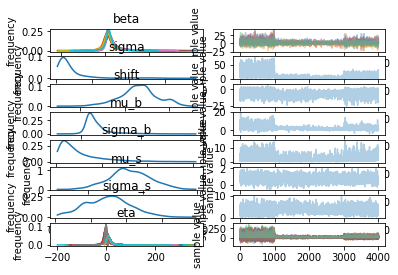

In [8]:
model.model.plot()

# Non-Bayesian Performance

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier( n_estimators = 10, max_depth = 4, n_jobs = -1 )

rf_clf.fit( df[['random_x', 'cat_1', 'cat_2']], df['random_y'] )

y_train_pred = rf_clf.predict( df[['random_x', 'cat_1', 'cat_2']]).astype(int)
y_val_pred = rf_clf.predict( df_val[['random_x', 'cat_1', 'cat_2']] ).astype(int)

accuracy_train = np.mean( labels == y_train_pred )
accuracy_val = np.mean( val_labels == y_val_pred )

In [10]:
print('Train Mean Accuracy: ' + str(accuracy_train))
print('Validation Mean Accuracy: ' + str(accuracy_val))

Train Mean Accuracy: 0.93
Validation Mean Accuracy: 0.877


# Comments

This shows that, with the presence of white noise, the Bayesian model is more equipped to learn from noisy data and make better predictions, while also taking care of the categorial differences in the data.